In [1]:
import pandas as pd

# Path to your text file
text_file_path = '/Applications/topas/OpticalPhantomTOPAS/Che_in_para_mua_01_musp_5.txt'

# Open the text file and read lines
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# Initialize an empty list to store data
data = []

# Iterate through each line
for line in lines:
    # Split the line into individual numbers
    numbers = line.strip().split()
    # Convert the numbers to floats and append to the data list
    data.append([float(num) for num in numbers])

# Convert the list of lists into a DataFrame
df = pd.DataFrame(data, columns=['wavelength', 'mua', 'mus', 'p'])

# Display the DataFrame
print(df)

     wavelength         mua       mus         p
0         400.0  130.337998  7.645694  1.000000
1         404.0  138.455143  7.582379  0.980296
2         408.0  150.910900  7.520087  0.961169
3         412.0  157.199065  7.458851  0.942596
4         416.0  159.975326  7.398646  0.924556
..          ...         ...       ...       ...
146       984.0    0.655104  3.595962  0.165246
147       988.0    0.636700  3.583765  0.163911
148       992.0    0.622068  3.571650  0.162591
149       996.0    0.607587  3.559618  0.161289
150      1000.0    0.593765  3.547675  0.160001

[151 rows x 4 columns]


In [2]:


# Planck's constant in eV s
plancks_constant_ev = 4.135667696e-15

# Speed of light in vacuum in meters per second
speed_of_light_mps = 299792458

# Calculate the energy in eV
df['eV'] = (plancks_constant_ev * speed_of_light_mps * 1e9) / df['wavelength']

# Display the DataFrame with the new 'eV' column
print(df)



     wavelength         mua       mus         p        eV
0         400.0  130.337998  7.645694  1.000000  3.099605
1         404.0  138.455143  7.582379  0.980296  3.068916
2         408.0  150.910900  7.520087  0.961169  3.038828
3         412.0  157.199065  7.458851  0.942596  3.009325
4         416.0  159.975326  7.398646  0.924556  2.980389
..          ...         ...       ...       ...       ...
146       984.0    0.655104  3.595962  0.165246  1.260002
147       988.0    0.636700  3.583765  0.163911  1.254901
148       992.0    0.622068  3.571650  0.162591  1.249841
149       996.0    0.607587  3.559618  0.161289  1.244821
150      1000.0    0.593765  3.547675  0.160001  1.239842

[151 rows x 5 columns]


In [11]:
import pandas as pd
import numpy as np

# Assuming df is defined
# μs' = μs * (1 - g) so mus is 10x mus'
set_mus = [6.89, 10.89, 20.35]
set_mua = [0.11, 0.40, 0.61]

for temp_mus in set_mus:
    for temp_mua in set_mua:

        # Storing new arrays for mus and mua
        mus_solved = []
        mua_solved = []

        # Current values of mus and mua in Yihongs 
        mus_665 = df.loc[df['wavelength'] == 664, 'mus']
        mua_665 = df.loc[df['wavelength'] == 664, 'mua']

        # Setting the properties at 664 nm 
        mua_offset = mua_665 - temp_mua
        mus_amplitude = temp_mus / (664 ** -0.863)

        for index, row in df.iterrows():
            mus_solved.append(mus_amplitude * row['wavelength'] ** -0.863)
            #mus_solved.append(temp_mus)
            mua_solved.append(temp_mua)


        mua_solved = [max(0, x) for x in mua_solved]

        new_df = df.copy()  # Create a copy of df
        new_df['mus'] = mus_solved
        new_df['mua'] = mua_solved

        new_df.to_csv('/Applications/topas/OpticalPhantomExperiment/OpticalPhantomMaterials/mus_' +str(np.round(temp_mus,2))+  '_mua_' + str(np.round(temp_mua,2))+ '.csv')


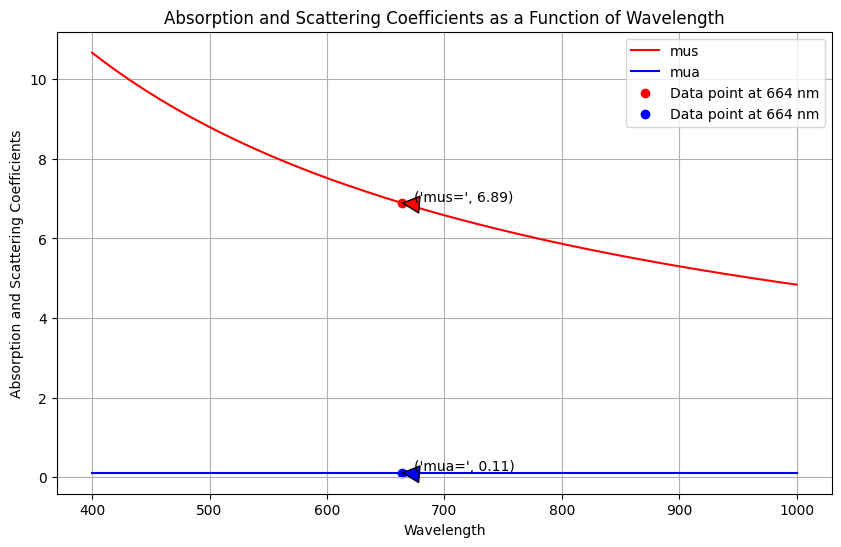

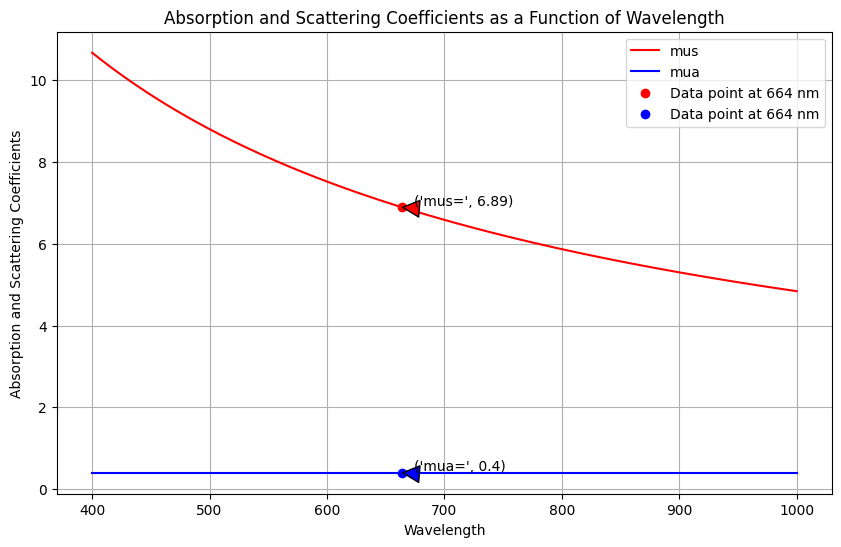

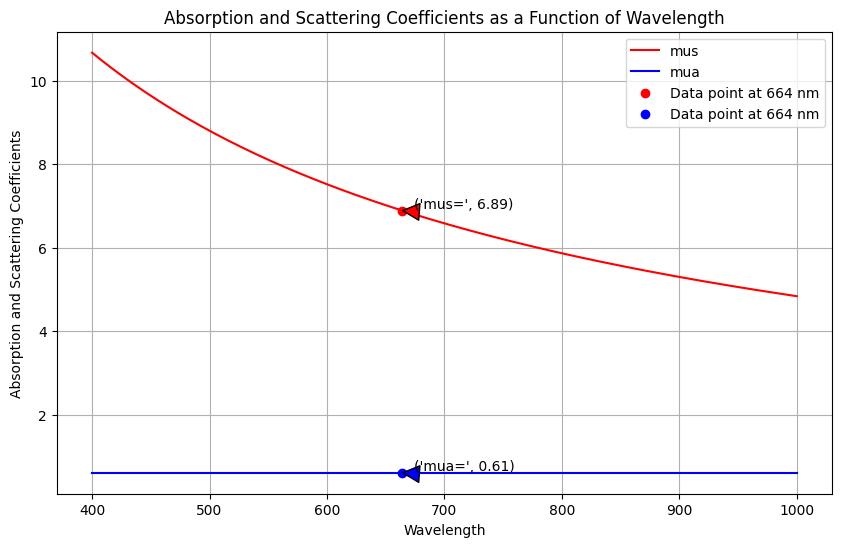

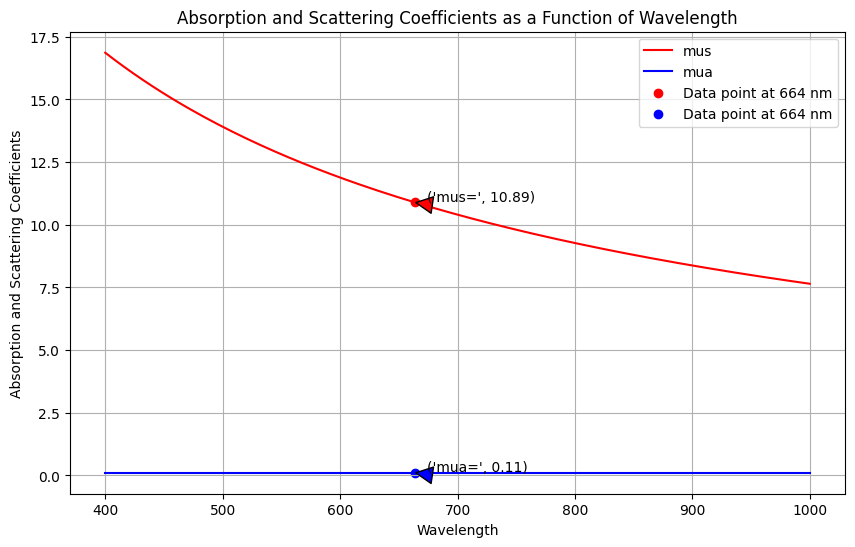

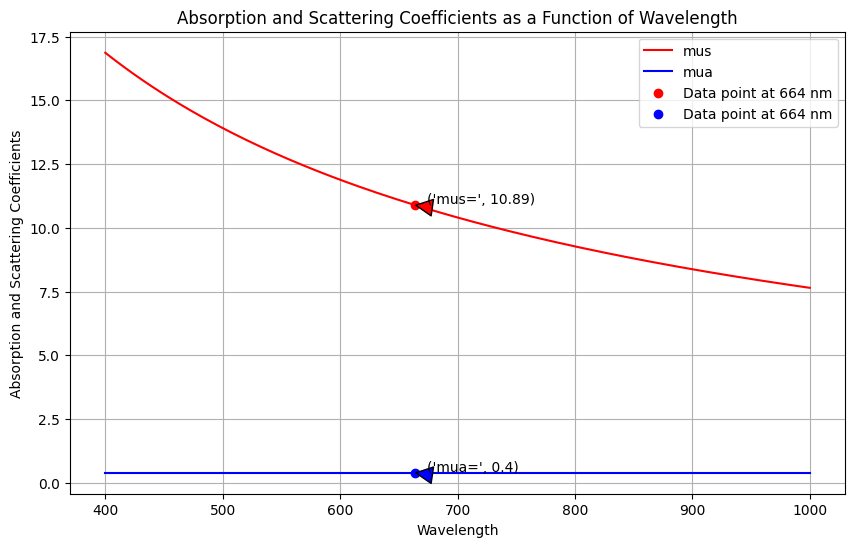

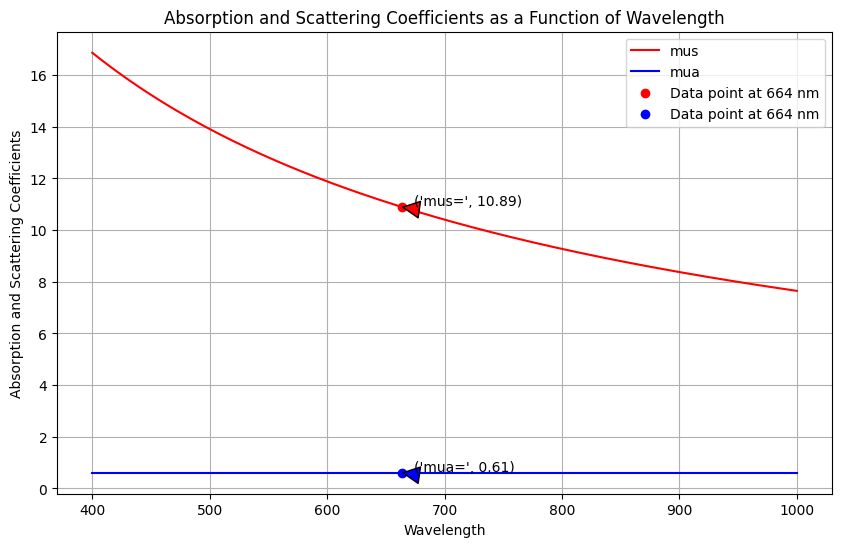

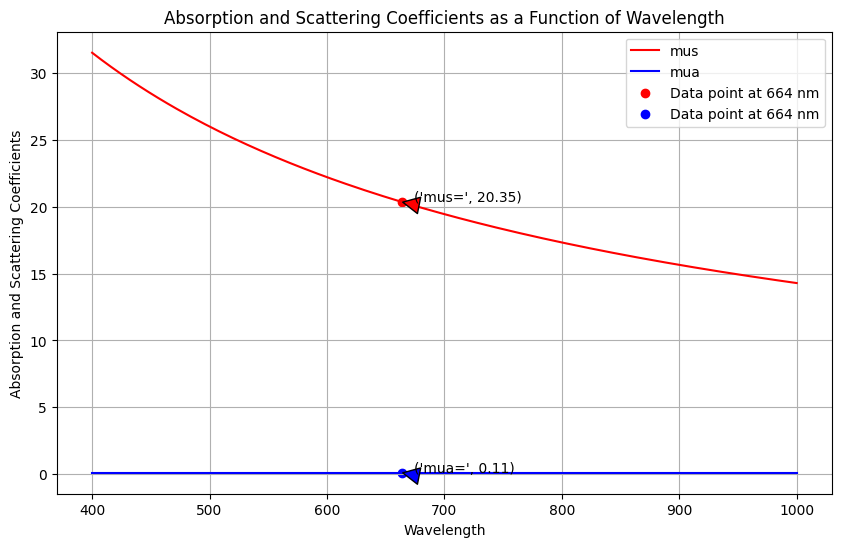

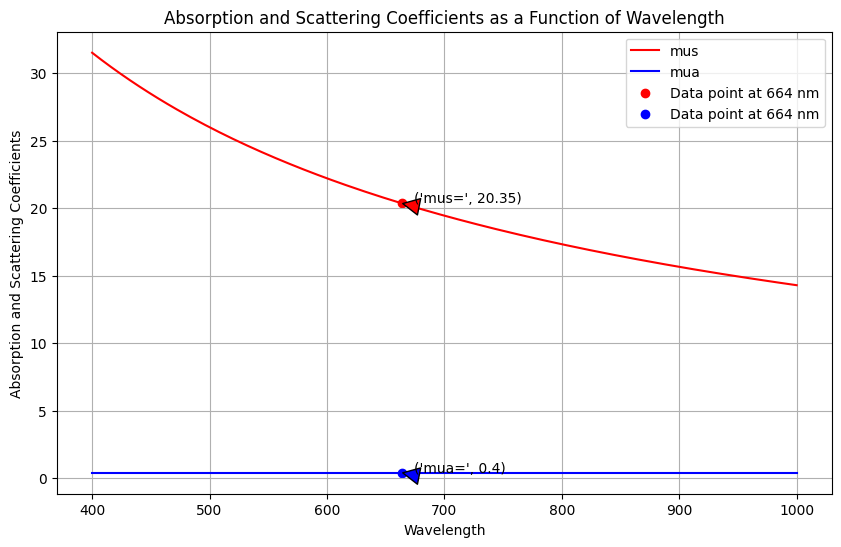

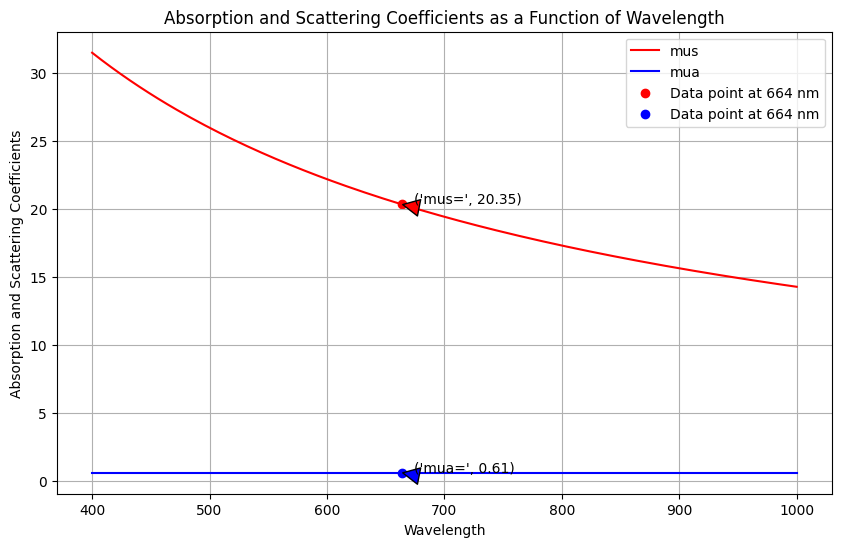

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

for temp_mus in set_mus:
    for temp_mua in set_mua:

        new_df = pd.read_csv('/Applications/topas/OpticalPhantomExperiment/OpticalPhantomMaterials/mus_' +str(np.round(temp_mus,2))+  '_mua_' + str(np.round(temp_mua,2))+ '.csv')
        
        plt.figure(figsize=(10, 6))

        # Plot mus
        plt.plot(new_df['wavelength'], new_df['mus'], label='mus', color='red')

        # Plot mua
        plt.plot(new_df['wavelength'], new_df['mua'], label='mua', color='blue')


        # Add a data point at 664
        plt.scatter(664, new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0], color='red', label='Data point at 664 nm')
        plt.scatter(664, new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0], color='blue', label='Data point at 664 nm')

        # Add a label for the data point at 664 for mus
        plt.annotate(('mus=', new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0]), xy=(664, new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0]), xytext=(664+10, new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0]+0.05),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    )

        # Add a label for the data point at 664 for mua
        plt.annotate(('mua=', np.round(new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0],2)), xy=(664, new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0]), xytext=(664+10, new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0]+0.05),
                    arrowprops=dict(facecolor='blue', shrink=0.05),
             )

        plt.xlabel('Wavelength')
        plt.ylabel('Absorption and Scattering Coefficients')
        plt.title('Absorption and Scattering Coefficients as a Function of Wavelength')
        plt.legend()
        plt.grid(True)
        plt.show()


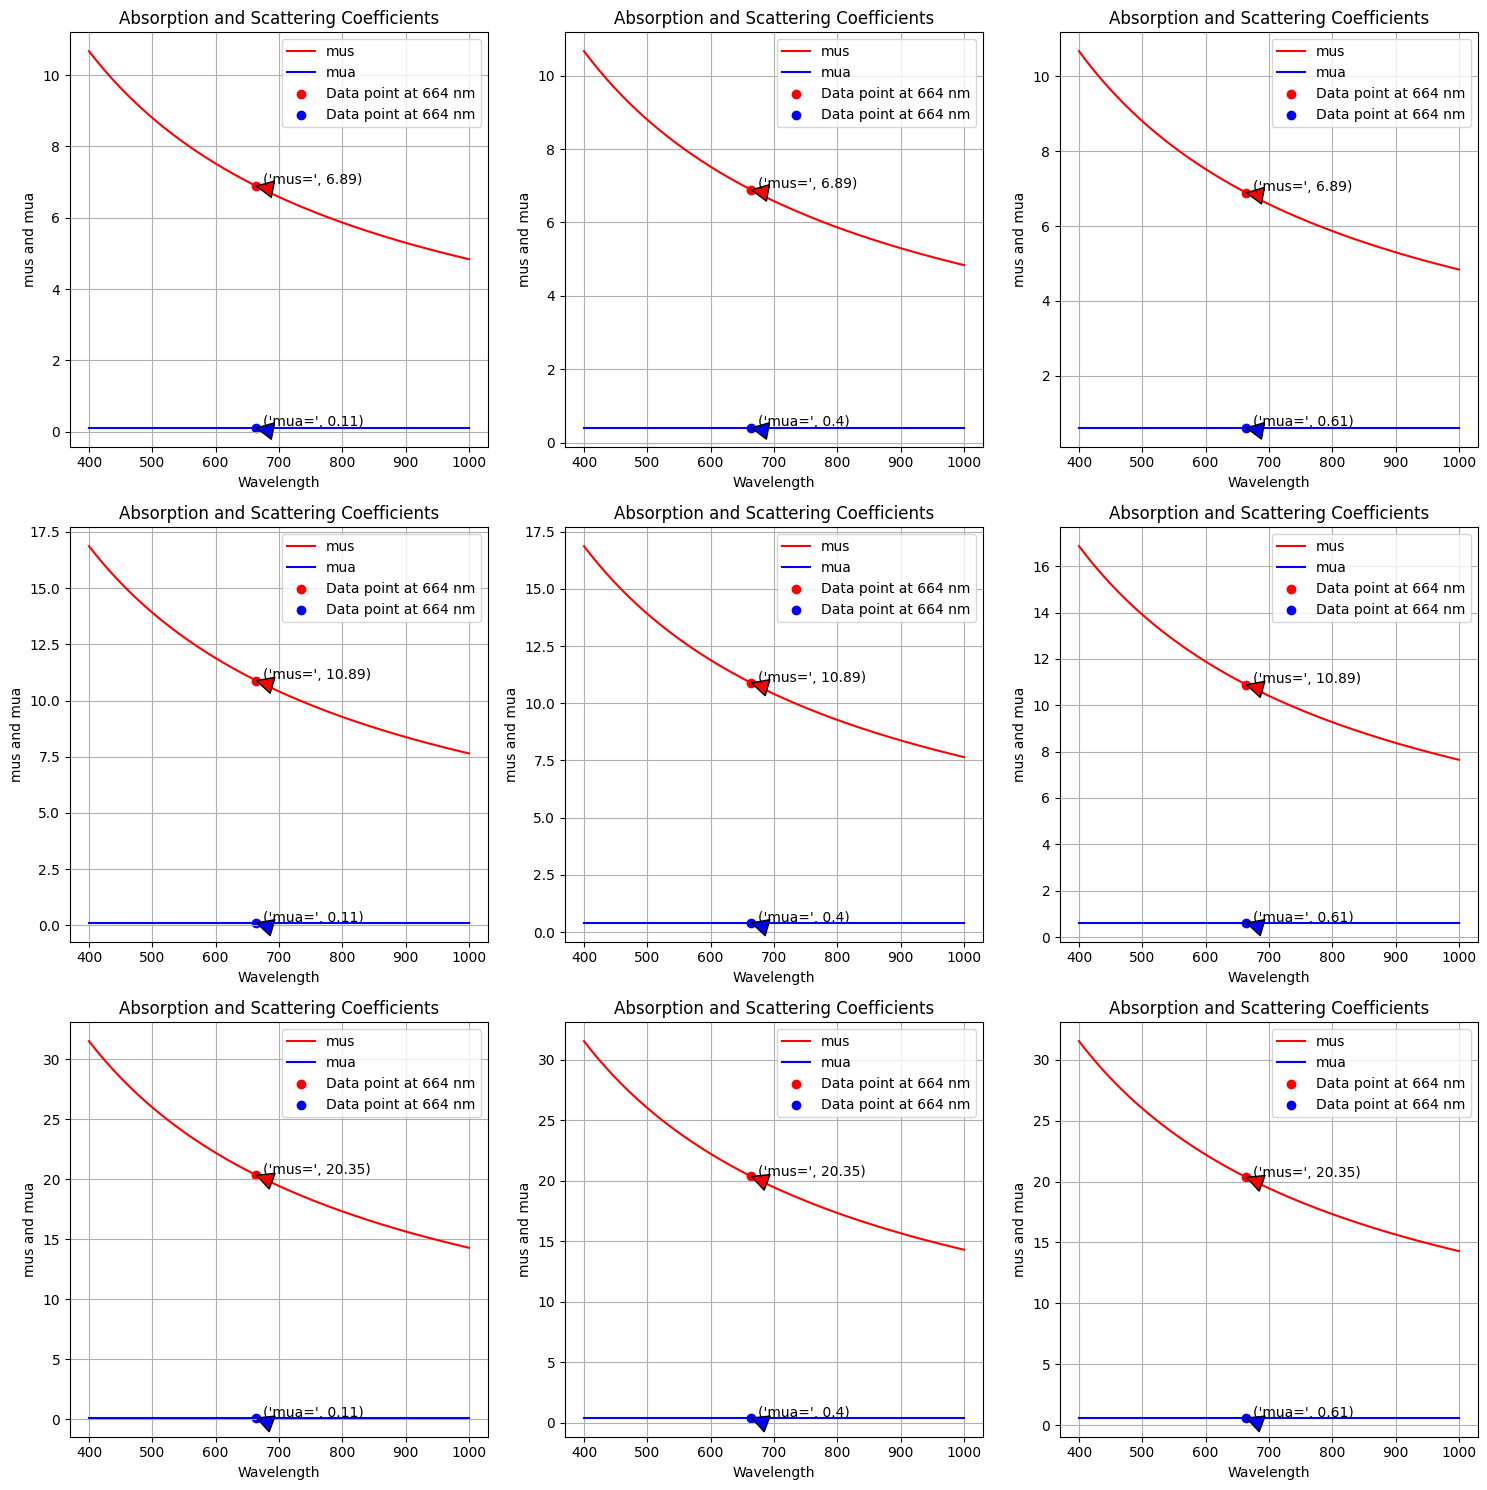

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the grid size
grid_size = (3, 3)

# Initialize figure and axes
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate over each combination of temp_mus and temp_mua
for i, temp_mus in enumerate(set_mus):
    for j, temp_mua in enumerate(set_mua):
        index = i * len(set_mua) + j
        
        # Break if we've reached the end of the axes array
        if index >= len(axes):
            break
        
        new_df = pd.read_csv('/Applications/topas/OpticalPhantomExperiment/OpticalPhantomMaterials/mus_' +str(np.round(temp_mus,2))+  '_mua_' + str(np.round(temp_mua,2))+ '.csv')
        
        # Plot mus
        axes[index].plot(new_df['wavelength'], new_df['mus'], label='mus', color='red')
        
        # Plot mua
        axes[index].plot(new_df['wavelength'], new_df['mua'], label='mua', color='blue')
        
        # Add a data point at 664
        axes[index].scatter(664, new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0], color='red', label='Data point at 664 nm')
        axes[index].scatter(664, new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0], color='blue', label='Data point at 664 nm')
        
        # Add a label for the data point at 664 for mus
        axes[index].annotate(('mus=', new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0]), xy=(664, new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0]), xytext=(664+10, new_df.loc[new_df['wavelength'] == 664, 'mus'].values[0]+0.05),
                            arrowprops=dict(facecolor='red', shrink=0.05))
        
        # Add a label for the data point at 664 for mua
        axes[index].annotate(('mua=', np.round(new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0],2)), xy=(664, new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0]), xytext=(664+10, new_df.loc[new_df['wavelength'] == 664, 'mua'].values[0]+0.05),
                            arrowprops=dict(facecolor='blue', shrink=0.05))
        
        axes[index].set_xlabel('Wavelength')
        axes[index].set_ylabel('mus and mua')
        axes[index].set_title('Absorption and Scattering Coefficients')
        axes[index].legend()
        axes[index].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig('montage_figure.png')

# Show the figure
plt.show()


# Block of code that uses same absorption lengths

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def generate_topas_file(batch_name, file_ending, absorption_length, scattering_length):
    header = f"""includeFile = PhantomExperiment.topas

# Set seed
i:Ts/Seed = 1

# Conditions for Phantom
s:Ge/fileEnding = "_{file_ending.replace(".", "")}"

# Add on to the files to identify optical properties
s:Sc/OpticalScorerMyBox01/OutputFile = Sc/OpticalScorerMyBox01/OutputFile + Ge/fileEnding

"""
    
    # Write to file
    with open('/Applications/topas/OpticalPhantomExperiment/OpticalPhantomMaterials/' + batch_name + '.topas', 'w') as f:
        f.write(header)
        
        # Define the list of multipliers
        mus_multipliers = [1.284216081, 1.163515813, 1.040339381, 0.91426823, 0.784729076, 0.65089233]
        mua_multipliers = [1.0158, 1.0513, 1.0092, 0.9909, 0.9908, 1.0277]

        line = "dv:Ma/MyWater/Miehg/Values  = 6 "
        
        # Iterate over each multiplier
        for multiplier_mus in mus_multipliers:
            # Construct the line with multiplied values
            line += " ".join([str(np.round(scattering_length * multiplier_mus,5))])
            line += " "
        line += " cm\n"
            
        # Write the line to the file
        f.write(line)

        line = "dv:Ma/MyWater/AbsLength/Values  = 6 "

        # Iterate over each multiplier
        for multiplier_mua in mua_multipliers:
            # Construct the line with multiplied values
            line += " ".join([str(np.round(absorption_length * multiplier_mua,5))])
            line += " "
        line += " cm\n"
            
        # Write the line to the file
        f.write(line)     

# Assuming df is defined
# μs' = μs * (1 - g) so mus is 10x mus'
set_mus = [6.89, 10.89, 20.35]
set_mua = [0.11, 0.40, 0.61]

b = 1
for temp_mus in set_mus:
    for temp_mua in set_mua:

        #   Define the absorption and scattering lengths
        # scattering_length = 1 / (temp_mus * 10) 
        scattering_length = 1 / (temp_mus) 
        absorption_length = 1 / (temp_mua)
        
        # Generate .topas file
        #generate_topas_file(batch_name, file_ending, energies, absorption_lengths, scattering_lengths)
        generate_topas_file(f"batch{b}", f"mus_{np.round(temp_mus, 2)}_mua_{np.round(temp_mua, 2)}",  absorption_length, scattering_length)

        b+=1

0.04914